In [1]:
import numpy as np

def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))


In [2]:
# Gradient descent based logistic regression from scratch
def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on current weights
    """
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

In [3]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights by one step
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights


In [4]:
def compute_cost(X, y, weights):
    """
     Compute the cost J(w)
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

In [5]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 100 (for example) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [6]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)


In [7]:
# A example
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])

y_train = np.array([0,
                    0,
                    0,
                    0,
                    0,
                    1,
                    1,
                    1,
                    1,
                    1])

In [8]:
weights = train_logistic_regression(X_train, y_train, max_iter=1000, learning_rate=0.1, fit_intercept=True)

X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])

predictions = predict(X_test, weights)

0.5744042371657099
0.034460223392510314
0.018265572708476167
0.012493458388041109
0.00951532913854745
0.007693388060646946
0.0064620943335143306
0.005573511846832293
0.004901632254525041
0.004375567740665165


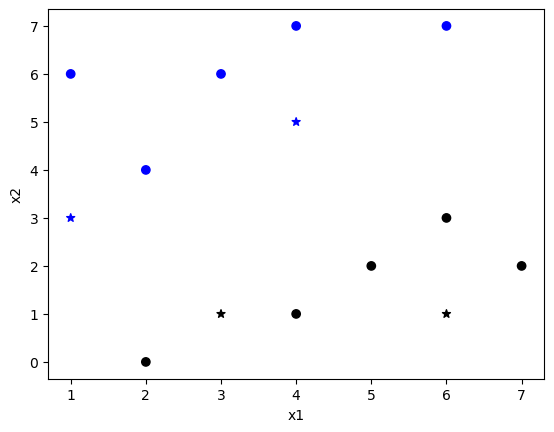

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=['b']*5+['k']*5, marker='o')
colours = ['k' if prediction >= 0.5 else 'b' for prediction in predictions]
plt.scatter(X_test[:,0], X_test[:,1], marker='*', c=colours)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
import pandas as pd
n_rows = 300000
df = pd.read_csv("desktop/train.csv", nrows=n_rows)

X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

n_train = 10000
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)

X_test_enc = enc.transform(X_test)
X_test_enc.shape

(290000, 2820)

In [12]:
import timeit
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_enc.toarray(), Y_train, max_iter=10000, learning_rate=0.01,
                                    fit_intercept=True)
print(f"--- {(timeit.default_timer() - start_time)}.3fs seconds ---")

0.6820019456743648
0.4608619713011896
0.4503715555130051
0.4455503890097847
0.4420611414384597
0.4393702812833892
0.437228041454526
0.4354781787758496
0.43401801289720116
0.4327779028622343
0.4317091585700226
0.43077673019057455
0.4299546928842355
0.42922339559221634
0.4285676184571522
0.42797535312823465
0.4274369752561037
0.42694466897530536
0.42649201676958726
0.42607370031421204
0.42568527750493995
0.42532301300292674
0.4249837472238756
0.42466479353954484
0.4243638565943513
0.4240789667070855
0.42380842671759145
0.42355076859163654
0.42330471776471257
0.42306916368249065
0.4228431353432208
0.42262578090532044
0.4224163506180466
0.42221418248223747
0.4220186901637542
0.42182935277298567
0.42164570619560027
0.42146733571705797
0.4212938697294381
0.421124974346345
0.4209603487818472
0.42079972137401617
0.42064284615376507
0.42048949987620765
0.4203394794453518
0.4201925996741633
0.4200486913313148
0.4199075994336318
0.419769181749643
0.4196333074849702
0.4194998561247411
0.4193687164

In [13]:
pred = predict(X_test_enc.toarray(), weights)
from sklearn.metrics import roc_auc_score
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')


Training samples: 10000, AUC on testing set: 0.703


In [14]:
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    """ One weight update iteration: moving weights by one step based on each individual sample
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        weights (numpy.ndarray)
        learning_rate (float)
    Returns:
        numpy.ndarray, updated weights
    """
    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights)
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate * weights_delta
    return weights


In [15]:
def train_logistic_regression_sgd(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model via SGD
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 2 (for example) iterations
        if iteration % 2 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [16]:
# Train the SGD model based on 100000 samples
start_time = timeit.default_timer()
weights = train_logistic_regression_sgd(X_train_enc.toarray(), Y_train, max_iter=10, learning_rate=0.01,
                                        fit_intercept=True)
print(f"--- {(timeit.default_timer() - start_time)}.3fs seconds ---")
pred = predict(X_test_enc.toarray(), weights)
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')


0.41496547913327814
0.4060071128286624
0.40104937451793143
0.397355285305202
0.3943631638289113
--- 1.0924021659999994.3fs seconds ---
Training samples: 10000, AUC on testing set: 0.713
